### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 3

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en endelig ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

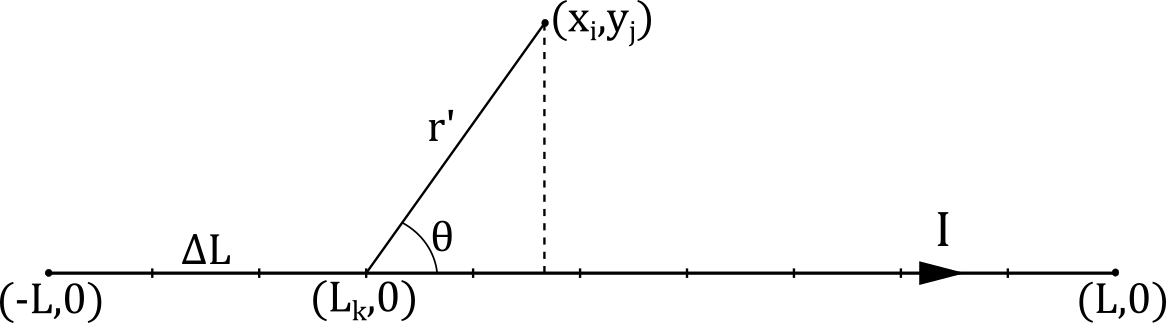

Systemet vi skal se på består av en endelig ledning som går fra $(-L,0)$ til $(L,0)$ der strømmen $I$ har retning mot høyre som vist på figuren. Fra Biot-Savarts lov har vi at magnetfeltet fra en slik ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er en vektor fra et punkt $\vec{l}$ på ledningen til $\vec{r} = (x,y)$. Integralet går over hele ledningen. 

Vi kan skrive ut kryssproduktet som $\text{d}\vec{l}\times\vec{r}' = |\text{d}\vec{l}||\vec{r}'|\sin\theta$, og vi ser fra figuren at $\sin\theta = \frac{y}{|\vec{r}'|}$. I tillegg ligger både $\vec{r'}$ og $\text{d}\vec{l}$ i xy-planet, så magnetfeltet er rettet langs z-aksen. Ved å sette inn alt dette i Biot-Savarts lov, finner vi at styrken på magnetfeltet er gitt ved
\begin{equation}
    B(x,y) = \frac{\mu_0I}{4 \pi} \int_{-L}^{L}\frac{\text{d}x\, y}{|r'|^3}.
\end{equation}

Vi skal nå utføre dette integralet numerisk, ved å skrive det om til en diskret sum over punkter på ledningen. Generellt kan vi dele inn ledningen i $N$ punkter (10 på figuren i og med at vi ikke teller høyre endepunkt) med innbyrdes avstand $\Delta L$. Et punkt på ledningen har da koordinat $(L_k, 0)$, der $L_k \in \{-L, -L+\Delta L, -L+2\Delta L, ... ,L-\Delta L\}$. Videre ser vi fra figuren at $|r'| = \sqrt{(L_k - x_i)^2 + y_j^2}$. Dermed kan integralet vårt skrives som
\begin{equation}
    B(x_i, y_j) = \frac{\mu_0I}{4 \pi} \sum_{k=1}^{N}\frac{\Delta L y_j}{((L_k-x_i)^2 +y_j^2))^{3/2}}
\end{equation}


## a)
Lag en funksjon create_wire som returnerer en array med $N$ punkter fra $-L$ til $L-\Delta L$.

In [61]:
import numpy as np
from matplotlib import pyplot as plt

def create_wire(N, L):
    return np.linspace(-L, L, N)[:-1]

wire = create_wire(100, 1)

[-1.         -0.97979798 -0.95959596 -0.93939394 -0.91919192 -0.8989899
 -0.87878788 -0.85858586 -0.83838384 -0.81818182 -0.7979798  -0.77777778
 -0.75757576 -0.73737374 -0.71717172 -0.6969697  -0.67676768 -0.65656566
 -0.63636364 -0.61616162 -0.5959596  -0.57575758 -0.55555556 -0.53535354
 -0.51515152 -0.49494949 -0.47474747 -0.45454545 -0.43434343 -0.41414141
 -0.39393939 -0.37373737 -0.35353535 -0.33333333 -0.31313131 -0.29292929
 -0.27272727 -0.25252525 -0.23232323 -0.21212121 -0.19191919 -0.17171717
 -0.15151515 -0.13131313 -0.11111111 -0.09090909 -0.07070707 -0.05050505
 -0.03030303 -0.01010101  0.01010101  0.03030303  0.05050505  0.07070707
  0.09090909  0.11111111  0.13131313  0.15151515  0.17171717  0.19191919
  0.21212121  0.23232323  0.25252525  0.27272727  0.29292929  0.31313131
  0.33333333  0.35353535  0.37373737  0.39393939  0.41414141  0.43434343
  0.45454545  0.47474747  0.49494949  0.51515152  0.53535354  0.55555556
  0.57575758  0.5959596   0.61616162  0.63636364  0.

## b)
Lag en funksjon calc_magneticfield som regner ut det magnetiske feltet for et meshgrid (xi, yj). Denne burde også ha ledningen du laget i a) som input. Magnetfeltet regnes ut ved å utføre den diskrete summen som ble utledet i introduksjonen. 

Tips: Ettersom vi deler på null når $x_i = L_k$ og $y_j = 0$, vil det oppstå numeriske singulariteter langs ledningen. Dette må løses på et fornuftig vis. 

In [89]:

def calc_magfield(wire, xx, yy):

    x = np.linspace(-xx, xx, len(wire))
    y = np.linspace(-yy, yy, len(wire))
    xv, yv = np.meshgrid(x, y)
    dl = abs(wire[0]-wire[1])
    B_tot = 0
    for dk in wire:
        B_tot += (dl*yv) / ((dk-xv)**2 + yv**2)**(3/2)
    B_tot[B_tot > 4] = 4
    B_tot[B_tot < -4] = -4
    return B_tot, xv, yv


## c) 
Fremstill resultatene i et heatplot. Dere kan f.eks velge $L=1$ og plotte for et område $x,y \in (-2,2)$. Magnetfeltet burde normaliseres (plottes i enhet $\mu_0I/4\pi$).

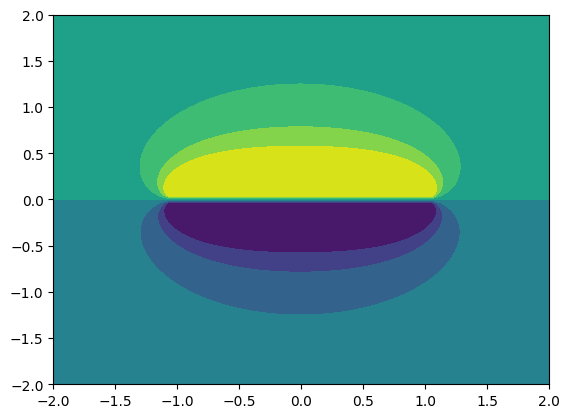

In [90]:
B, x, y = calc_magfield(wire, 2, 2)

plt.contourf(x, y, B)

### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

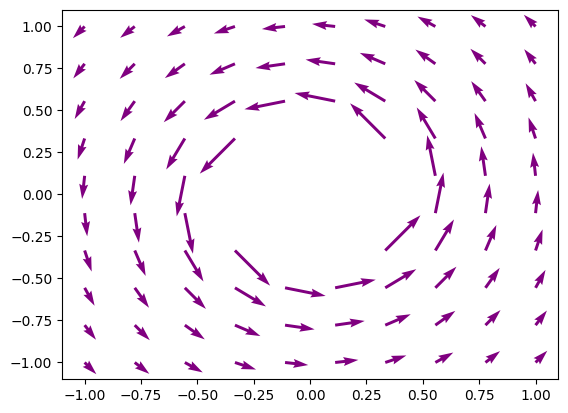

In [130]:
def B_r(r):
    return 1/r**2

x = np.linspace(-1, 1, 10)
y = np.linspace(-1, 1, 10)
xv, yv = np.meshgrid(x, y)
R = np.sqrt(xv**2 + yv**2)
R[ R < 0.4] = np.nan

dy = xv * B_r(R)
dx = -yv * B_r(R)


plt.quiver(xv, yv, dx, dy, color='purple')
plt.show()



$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.